In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import datetime as dt

In [2]:
import pandas as pd
import pickle

In [3]:
may = pd.read_pickle("data/may.pkl")
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,Bird
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,Bird
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,Bird
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,Bird


In [4]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [5]:
may.chargelevel.value_counts()

100.00    2364422
0.00      1025190
98.00      456863
99.00      417371
96.00      398695
           ...   
13.35           1
27.26           1
21.15           1
17.04           1
58.90           1
Name: chargelevel, Length: 885, dtype: int64

In [6]:
#may = may.loc[(may['chargelevel'] >= 0.00) & (may['chargelevel'] <= 0.00)]

In [8]:
#may[may.pubdatetime.dt.strftime('%H:%M:%S').between_time('00:45:00', '00:15:00')] -Index must be DatetimeIndex
#may['hour'] = may['pubdatetime'].dt.hour
#hour = may.hour.reset_index()
#may.head()

In [9]:
#may.loc[may['hour']

In [10]:
may.pubdatetime.nlargest() #doesn't make sense. The time and date is pin point the scooter location. 

20292498   2019-05-31 23:59:42
20292499   2019-05-31 23:59:42
20292500   2019-05-31 23:59:42
20292501   2019-05-31 23:59:42
20292502   2019-05-31 23:59:42
Name: pubdatetime, dtype: datetime64[ns]

In [ ]:
co_name = may.companyname.value_counts()
co_name = co_name.reset_index()
co_name = co_name.rename(columns = {'index':'company_name', 'companyname':'num'})
co_name.head(10)

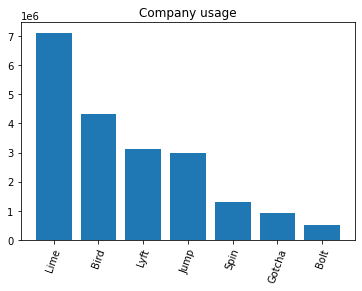

In [12]:
plt.bar('company_name', 'num', data = co_name)
plt.xticks(rotation = 70)
plt.title('Company usage'); #company scooter report counts, not the most the scooter on the street

In [13]:
may.sumdid.value_counts()

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
Powered1PKP7               1
PoweredN4YI2A7RXZQLY       1
Powered3361332             1
Powered523737              1
PoweredCI6VKIK2KOFMC       1
Name: sumdid, Length: 8303, dtype: int64

In [ ]:
may[may['sumdid']].isin(['Lime'])

In [15]:
may.loc[(may['sumdid'] == 'Powered515')]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
1150,2019-05-01 00:04:48.030,36.121581,-86.770304,Powered515,3.0,Gotcha
3318,2019-05-01 00:09:48.257,36.121581,-86.770304,Powered515,3.0,Gotcha
5542,2019-05-01 00:14:48.537,36.121581,-86.770304,Powered515,3.0,Gotcha
7716,2019-05-01 00:19:48.763,36.121581,-86.770304,Powered515,3.0,Gotcha
9911,2019-05-01 00:24:49.147,36.121581,-86.770304,Powered515,3.0,Gotcha
...,...,...,...,...,...,...
20277223,2019-05-31 23:37:12.950,36.121581,-86.770304,Powered515,3.0,Gotcha
20280669,2019-05-31 23:42:13.147,36.121581,-86.770304,Powered515,3.0,Gotcha
20284093,2019-05-31 23:47:13.240,36.121581,-86.770304,Powered515,3.0,Gotcha
20287541,2019-05-31 23:52:13.357,36.121581,-86.770304,Powered515,3.0,Gotcha


In [16]:
may.loc[(may['sumdid'] == 'Powered609')]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
1206,2019-05-01 00:04:48.030,36.121391,-86.770298,Powered609,0.0,Gotcha
3419,2019-05-01 00:09:48.257,36.121391,-86.770298,Powered609,0.0,Gotcha
5584,2019-05-01 00:14:48.537,36.121391,-86.770298,Powered609,0.0,Gotcha
7774,2019-05-01 00:19:48.763,36.121391,-86.770298,Powered609,0.0,Gotcha
9972,2019-05-01 00:24:49.147,36.121391,-86.770298,Powered609,0.0,Gotcha
...,...,...,...,...,...,...
20277178,2019-05-31 23:37:12.950,36.121391,-86.770298,Powered609,0.0,Gotcha
20280587,2019-05-31 23:42:13.147,36.121391,-86.770298,Powered609,0.0,Gotcha
20284162,2019-05-31 23:47:13.240,36.121391,-86.770298,Powered609,0.0,Gotcha
20287607,2019-05-31 23:52:13.357,36.121391,-86.770298,Powered609,0.0,Gotcha


In [ ]:
#merage successfully but take long time. 
may['geometry'] = may.apply(lambda x: Point((x.longitude, 
                                            x.latitude)), 
                                        axis=1)
may.head(3) 